# Financial Analysis and Prediction of AAPL Stock

## Summary : In this Jupyter notebook First the price of AAPL stock has been predicted with the models and then various Financial Analysis techniques have been caried out Including Generating and Analysing the Trading Strategy.


## Name - Harsh Dave
## Email - harshdave24197@gmail.com
## Mobile - +91 940623066

In [1]:
import pandas as pd
train = pd.read_csv('stock_AAPL.csv')
train.head()

,date_txn,symbol,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv,log_timestamp,datasource
0,2016-06-28,AAPL,92.90,93.66,92.14,93.59,40444914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
1,2016-06-29,AAPL,93.97,94.55,93.63,94.40,36531006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
2,2016-06-30,AAPL,94.44,95.77,94.30,95.60,35836356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
3,2016-07-01,AAPL,95.49,96.46,95.33,95.89,26026540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
4,2016-07-05,AAPL,95.39,95.40,94.46,94.99,27705210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN


# General Overall Description of AAPL Dataset

In [2]:
train.describe()

C:\Users\admin\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv
count,403.000000,403.000000,403.000000,403.000000,4.030000e+02,370.000000,383.000000,383.000000,383.000000,383.000000,383.000000,379.000000,383.000000,3.830000e+02
mean,138.379504,139.315261,137.496452,138.493945,2.936934e+07,1.408784,57.529060,60.610966,-0.342219,0.657807,65.775274,140.759683,-0.008695,7.094327e+08
std,24.205132,24.293410,23.970691,24.121304,1.286572e+07,1.554942,14.327854,13.415921,0.281421,0.281452,26.329497,22.633862,0.239891,3.542151e+08
min,92.900000,93.660000,92.140000,93.590000,1.147592e+07,-1.800000,10.220000,28.960000,-1.000000,0.000000,7.950000,103.540000,-0.930000,3.801469e+07
25%,114.330000,115.715000,113.500000,114.550000,2.143903e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,143.500000,144.160000,142.510000,143.640000,2.615330e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,157.145000,158.130000,156.115000,157.065000,3.337260e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,179.370000,180.100000,178.250000,179.260000,1.123403e+08,4.950000,88.050000,90.400000,0.000000,1.000000,99.150000,178.310000,0.800000,1.268303e+09


In [3]:
pd.to_datetime(train['date_txn'], format="%Y/%m/%d")

0     2016-06-28
1     2016-06-29
2     2016-06-30
3     2016-07-01
4     2016-07-05
5     2016-07-06
6     2016-07-07
7     2016-07-08
8     2016-07-11
9     2016-07-12
10    2016-07-13
11    2016-07-14
12    2016-07-15
13    2016-07-18
14    2016-07-19
15    2016-07-20
16    2016-07-21
17    2016-07-22
18    2016-07-25
19    2016-07-26
20    2016-07-27
21    2016-07-28
22    2016-07-29
23    2016-08-01
24    2016-08-02
25    2016-08-03
26    2016-08-04
27    2016-08-05
28    2016-08-08
29    2016-08-09
         ...    
373   2017-12-19
374   2017-12-20
375   2017-12-21
376   2017-12-22
377   2017-12-26
378   2017-12-27
379   2017-12-28
380   2017-12-29
381   2018-01-02
382   2018-01-03
383   2018-01-04
384   2018-01-05
385   2018-01-08
386   2018-01-09
387   2018-01-10
388   2018-01-11
389   2018-01-12
390   2018-01-16
391   2018-01-17
392   2018-01-18
393   2018-01-19
394   2018-01-22
395   2018-01-23
396   2018-01-24
397   2018-01-25
398   2018-01-26
399   2018-01-29
400   2018-01-

In [4]:
train = train.set_index('date_txn')

In [5]:
df = train

# Dropping the Unnecessary columns

In [6]:
df = df.drop(['symbol','log_timestamp','datasource'],axis = 1)

In [7]:
df

,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv
date_txn,,,,,,,,,,,,,,
2016-06-28,92.90,93.66,92.14,93.59,40444914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-29,93.97,94.55,93.63,94.40,36531006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,94.44,95.77,94.30,95.60,35836356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,95.49,96.46,95.33,95.89,26026540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,95.39,95.40,94.46,94.99,27705210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-06,94.60,95.66,94.37,95.53,30949090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-07,95.70,96.50,95.62,95.94,25139558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-08,96.49,96.89,96.05,96.68,28912103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-11,96.75,97.65,96.73,96.98,23794945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Finding no. of NaN values in each column

In [8]:
df.isnull().sum()

open                   0
high                   0
low                    0
close                  0
volume                 0
macd                  33
mfi                   20
rsi                   20
william_r             20
stochastic_fast       20
stochastic_slow       20
bollinger_bands       24
chaikin_money_flow    20
obv                   20
dtype: int64

# Plotting AAPL (open, high, low, close)

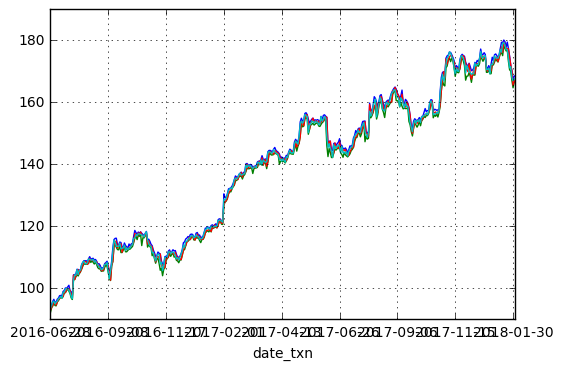

In [9]:
import matplotlib.pyplot as plt

df['high'].plot(grid=True)
df['low'].plot(grid=True)
df['open'].plot(grid=True)
df['close'].plot(grid=True)
plt.show()

# Removing the rows that contained too much of NaN values

In [10]:
df.dropna(subset=['mfi'], inplace = True)

# Finding NaN remaoining in each column

In [11]:
df.isnull().sum()

open                   0
high                   0
low                    0
close                  0
volume                 0
macd                  13
mfi                    0
rsi                    0
william_r              0
stochastic_fast        0
stochastic_slow        0
bollinger_bands        4
chaikin_money_flow     0
obv                    0
dtype: int64

In [12]:
df


,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv
date_txn,,,,,,,,,,,,,,
2016-07-27,104.26,104.35,102.75,102.95,92344820,NaN,64.34,75.31,-0.17,0.83,49.15,NaN,0.67,248242740.0
2016-07-28,102.83,104.45,102.82,104.34,39869839,NaN,65.27,77.54,-0.01,0.99,67.09,NaN,0.72,288112579.0
2016-07-29,104.19,104.55,103.68,104.21,27733688,NaN,65.66,76.84,-0.04,0.96,92.53,NaN,0.53,260378891.0
2016-08-01,104.41,106.15,104.41,106.05,38167871,NaN,66.72,79.65,-0.01,0.99,97.81,NaN,0.44,298546762.0
2016-08-02,106.05,106.07,104.00,104.48,33816556,NaN,65.47,71.67,-0.17,0.83,92.54,103.54,0.51,264730206.0
2016-08-03,104.81,105.84,104.77,105.79,30202641,NaN,65.06,74.01,-0.04,0.96,92.70,104.48,0.40,294932847.0
2016-08-04,105.58,106.00,105.28,105.87,27408650,NaN,65.01,74.15,-0.03,0.97,92.09,105.23,0.42,322341497.0
2016-08-05,106.27,107.65,106.18,107.48,40553402,NaN,65.46,76.86,-0.02,0.98,97.30,105.96,0.33,362894899.0
2016-08-08,107.52,108.37,107.16,108.37,28037220,NaN,65.87,78.22,0.00,1.00,98.54,106.73,0.30,390932119.0


The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


# Finding the missing values of " bollinger_bands " with simple regression technique

### Using model prediction because this is the most suitable method to fill NaN values in this case (in my opininon)

In [13]:
dfx = df
dfx = dfx.drop(['macd'],axis = 1)
dfx_train = dfx.ix[4:,:]
dfx_pred = dfx.ix[:4,:]

In [14]:
dfx_pred

,open,high,low,close,volume,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv
date_txn,,,,,,,,,,,,,
2016-07-27,104.26,104.35,102.75,102.95,92344820,64.34,75.31,-0.17,0.83,49.15,NaN,0.67,248242740.0
2016-07-28,102.83,104.45,102.82,104.34,39869839,65.27,77.54,-0.01,0.99,67.09,NaN,0.72,288112579.0
2016-07-29,104.19,104.55,103.68,104.21,27733688,65.66,76.84,-0.04,0.96,92.53,NaN,0.53,260378891.0
2016-08-01,104.41,106.15,104.41,106.05,38167871,66.72,79.65,-0.01,0.99,97.81,NaN,0.44,298546762.0


In [15]:
dfx_train

,open,high,low,close,volume,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv
date_txn,,,,,,,,,,,,,
2016-08-02,106.05,106.07,104.00,104.48,33816556,65.47,71.67,-0.17,0.83,92.54,103.54,0.51,264730206.0
2016-08-03,104.81,105.84,104.77,105.79,30202641,65.06,74.01,-0.04,0.96,92.70,104.48,0.40,294932847.0
2016-08-04,105.58,106.00,105.28,105.87,27408650,65.01,74.15,-0.03,0.97,92.09,105.23,0.42,322341497.0
2016-08-05,106.27,107.65,106.18,107.48,40553402,65.46,76.86,-0.02,0.98,97.30,105.96,0.33,362894899.0
2016-08-08,107.52,108.37,107.16,108.37,28037220,65.87,78.22,0.00,1.00,98.54,106.73,0.30,390932119.0
2016-08-09,108.23,108.94,108.01,108.81,26315204,66.01,78.88,-0.01,0.99,99.15,107.50,0.19,417247323.0
2016-08-10,108.71,108.90,107.76,108.00,24008505,66.80,74.40,-0.08,0.92,97.15,108.07,0.26,393238818.0
2016-08-11,108.52,108.93,107.85,107.93,27484506,71.96,74.01,-0.08,0.92,94.46,108.41,0.21,365754312.0
2016-08-12,107.78,108.44,107.78,108.18,18660434,74.55,74.53,-0.06,0.94,92.78,108.60,0.25,384414746.0


In [16]:
from sklearn.linear_model import LinearRegression
X = dfx_train.drop(['bollinger_bands'],axis = 1)
Y = dfx_train['bollinger_bands']
model = LinearRegression().fit(X,Y)


In [17]:
preds = model.predict(dfx_pred.drop(['bollinger_bands'],axis = 1))

In [18]:
preds

array([  98.80178264,  100.47244589,  103.05194672,  104.10222094])

In [19]:
df['bollinger_bands'].iloc[0:4] = preds

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# Finding the missing values of " macd " with simple simple model

In [20]:
dfy = df
dfy_train = dfy.ix[13:,:]
dfy_pred = dfy.ix[:13,:]
X = dfy_train.drop(['macd'],axis = 1)
Y = dfy_train['macd']
modely = LinearRegression().fit(X,Y)


In [21]:
predys = modely.predict(dfy_pred.drop(['macd'],axis = 1))

In [22]:
predys

array([ 2.23702975,  2.1175345 ,  2.77581786,  2.96121892,  2.3935185 ,
        2.30938423,  2.52177273,  2.71652025,  2.76867293,  2.91118715,
        2.81604689,  2.84349204,  2.77476428])

# Replacing value with Predictions

In [23]:
df['macd'].iloc[0:13] = predys

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df

,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv
date_txn,,,,,,,,,,,,,,
2016-07-27,104.26,104.35,102.75,102.95,92344820,2.237030,64.34,75.31,-0.17,0.83,49.15,98.801783,0.67,248242740.0
2016-07-28,102.83,104.45,102.82,104.34,39869839,2.117535,65.27,77.54,-0.01,0.99,67.09,100.472446,0.72,288112579.0
2016-07-29,104.19,104.55,103.68,104.21,27733688,2.775818,65.66,76.84,-0.04,0.96,92.53,103.051947,0.53,260378891.0
2016-08-01,104.41,106.15,104.41,106.05,38167871,2.961219,66.72,79.65,-0.01,0.99,97.81,104.102221,0.44,298546762.0
2016-08-02,106.05,106.07,104.00,104.48,33816556,2.393518,65.47,71.67,-0.17,0.83,92.54,103.540000,0.51,264730206.0
2016-08-03,104.81,105.84,104.77,105.79,30202641,2.309384,65.06,74.01,-0.04,0.96,92.70,104.480000,0.40,294932847.0
2016-08-04,105.58,106.00,105.28,105.87,27408650,2.521773,65.01,74.15,-0.03,0.97,92.09,105.230000,0.42,322341497.0
2016-08-05,106.27,107.65,106.18,107.48,40553402,2.716520,65.46,76.86,-0.02,0.98,97.30,105.960000,0.33,362894899.0
2016-08-08,107.52,108.37,107.16,108.37,28037220,2.768673,65.87,78.22,0.00,1.00,98.54,106.730000,0.30,390932119.0


# Creating some additional useful columns

In [25]:
df['HL_PCT'] = (df['high'] - df['low']) / df['close'] * 100.0
df['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100.0

In [26]:
import math
import numpy as np
from sklearn import preprocessing, cross_validation, svm

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# No. of days that we are Forecasting

In [27]:
forecast_col = 'close'
forecast_out = int(math.ceil(0.08 * len(df)))
print(forecast_out)

31


In [28]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [29]:
df

,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv,HL_PCT,PCT_change,label
date_txn,,,,,,,,,,,,,,,,,
2016-07-27,104.26,104.35,102.75,102.95,92344820,2.237030,64.34,75.31,-0.17,0.83,49.15,98.801783,0.67,248242740.0,1.554153,-1.256474,103.13
2016-07-28,102.83,104.45,102.82,104.34,39869839,2.117535,65.27,77.54,-0.01,0.99,67.09,100.472446,0.72,288112579.0,1.562200,1.468443,105.44
2016-07-29,104.19,104.55,103.68,104.21,27733688,2.775818,65.66,76.84,-0.04,0.96,92.53,103.051947,0.53,260378891.0,0.834853,0.019196,107.95
2016-08-01,104.41,106.15,104.41,106.05,38167871,2.961219,66.72,79.65,-0.01,0.99,97.81,104.102221,0.44,298546762.0,1.640736,1.570731,111.77
2016-08-02,106.05,106.07,104.00,104.48,33816556,2.393518,65.47,71.67,-0.17,0.83,92.54,103.540000,0.51,264730206.0,1.981240,-1.480434,115.57
2016-08-03,104.81,105.84,104.77,105.79,30202641,2.309384,65.06,74.01,-0.04,0.96,92.70,104.480000,0.40,294932847.0,1.011438,0.935025,114.92
2016-08-04,105.58,106.00,105.28,105.87,27408650,2.521773,65.01,74.15,-0.03,0.97,92.09,105.230000,0.42,322341497.0,0.680079,0.274673,113.58
2016-08-05,106.27,107.65,106.18,107.48,40553402,2.716520,65.46,76.86,-0.02,0.98,97.30,105.960000,0.33,362894899.0,1.367696,1.138609,113.57
2016-08-08,107.52,108.37,107.16,108.37,28037220,2.768673,65.87,78.22,0.00,1.00,98.54,106.730000,0.30,390932119.0,1.116545,0.790551,113.55


# 1.Preprocessing
# 2.Training [ with simple model , complicated models can be used as per the requierment ]
# 3.Predicting

In [30]:
dfnew = df
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfnew['label'][:-forecast_out])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
# confidence ~= 0.896
forecast_set = clf.predict(X_lately)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [31]:
forecast_set

array([ 179.87511484,  177.26575236,  179.96966511,  180.73074479,
        180.65777612,  178.0136267 ,  180.48942291,  180.79834661,
        179.92448918,  184.57817034,  182.14927321,  182.4651513 ,
        182.92855668,  182.1191295 ,  182.13429658,  183.43005402,
        183.70790064,  185.53966062,  186.78606871,  187.91270462,
        185.45130325,  185.72206105,  183.60470656,  186.42355753,
        184.15569763,  184.41771623,  182.89729192,  181.52846093,
        181.64191742,  180.4759704 ,  180.58443984])

In [32]:
df

,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv,HL_PCT,PCT_change,label
date_txn,,,,,,,,,,,,,,,,,
2016-07-27,104.26,104.35,102.75,102.95,92344820,2.237030,64.34,75.31,-0.17,0.83,49.15,98.801783,0.67,248242740.0,1.554153,-1.256474,103.13
2016-07-28,102.83,104.45,102.82,104.34,39869839,2.117535,65.27,77.54,-0.01,0.99,67.09,100.472446,0.72,288112579.0,1.562200,1.468443,105.44
2016-07-29,104.19,104.55,103.68,104.21,27733688,2.775818,65.66,76.84,-0.04,0.96,92.53,103.051947,0.53,260378891.0,0.834853,0.019196,107.95
2016-08-01,104.41,106.15,104.41,106.05,38167871,2.961219,66.72,79.65,-0.01,0.99,97.81,104.102221,0.44,298546762.0,1.640736,1.570731,111.77
2016-08-02,106.05,106.07,104.00,104.48,33816556,2.393518,65.47,71.67,-0.17,0.83,92.54,103.540000,0.51,264730206.0,1.981240,-1.480434,115.57
2016-08-03,104.81,105.84,104.77,105.79,30202641,2.309384,65.06,74.01,-0.04,0.96,92.70,104.480000,0.40,294932847.0,1.011438,0.935025,114.92
2016-08-04,105.58,106.00,105.28,105.87,27408650,2.521773,65.01,74.15,-0.03,0.97,92.09,105.230000,0.42,322341497.0,0.680079,0.274673,113.58
2016-08-05,106.27,107.65,106.18,107.48,40553402,2.716520,65.46,76.86,-0.02,0.98,97.30,105.960000,0.33,362894899.0,1.367696,1.138609,113.57
2016-08-08,107.52,108.37,107.16,108.37,28037220,2.768673,65.87,78.22,0.00,1.00,98.54,106.730000,0.30,390932119.0,1.116545,0.790551,113.55


# Plotting the Forecast

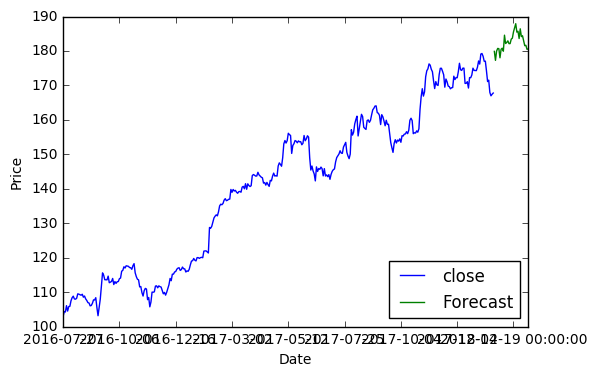

In [33]:
df['Forecast'] = np.nan

import datetime
last_date = df.iloc[-1].name
last_date = datetime.datetime.strptime(last_date,'%Y-%m-%d')
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Financial Analysis 

### In first few lines of codes terms used are mostly self-explanatory

In [35]:
df.index = pd.to_datetime(df.index, format="%Y/%m/%d") 

In [39]:
monthly = df.resample('BM').apply(lambda x: x[-1])
monthly.pct_change()
quarter = df.resample("4M").mean()
quarter.pct_change()

,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv,HL_PCT,PCT_change,label,Forecast
date_txn,,,,,,,,,,,,,,,,,,
2016-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,0.068933,0.069885,0.068133,0.069177,-0.344070,-0.470233,-0.149389,-0.233728,4.235729,-0.335202,-0.112944,0.100237,-0.747275,0.446899,0.125901,0.320133,0.080325,NaN
2017-03-31,0.144456,0.143884,0.148651,0.146824,-0.207155,0.753052,0.230204,0.236949,-0.596148,0.371552,0.367475,0.141815,-1.378405,0.884185,-0.277685,2.039965,0.217310,NaN
2017-07-31,0.165907,0.164888,0.161772,0.162286,-0.084518,-0.605207,-0.211700,-0.215573,1.576535,-0.289320,-0.283295,0.167889,-0.478346,0.340204,0.243552,-1.020449,0.102488,NaN
2017-11-30,0.092372,0.092604,0.091768,0.092392,0.102356,0.855510,0.030865,0.011501,-0.068645,0.045865,0.037957,0.090272,4.258973,0.087153,0.057082,-0.123642,0.088168,NaN
2018-03-31,0.068645,0.069134,0.070552,0.069292,0.033896,-0.331792,-0.050618,-0.074254,0.266964,-0.158357,-0.148462,0.074262,-1.426824,-0.852966,-0.092420,-11.027405,0.036973,NaN


In [47]:
daily_close = df[['close']]
daily_close['close'].ix[-31:] = forecast_set
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)
print(daily_pct_c)
daily_log_returns = np.log(daily_close.pct_change()+1)

# daily log returns
print(daily_log_returns)

               close
date_txn            
2016-07-27  0.000000
2016-07-28  0.013502
2016-07-29 -0.001246
2016-08-01  0.017657
2016-08-02 -0.014804
2016-08-03  0.012538
2016-08-04  0.000756
2016-08-05  0.015207
2016-08-08  0.008281
2016-08-09  0.004060
2016-08-10 -0.007444
2016-08-11 -0.000648
2016-08-12  0.002316
2016-08-15  0.012017
2016-08-16 -0.000913
2016-08-17 -0.001463
2016-08-18 -0.001282
2016-08-19  0.002567
2016-08-22 -0.007772
2016-08-23  0.003133
2016-08-24 -0.007533
2016-08-25 -0.004258
2016-08-26 -0.005857
2016-08-29 -0.001122
2016-08-30 -0.007676
2016-08-31  0.000943
2016-09-01  0.005938
2016-09-02  0.009369
2016-09-06 -0.000278
2016-09-07  0.006128
...              ...
2018-02-03 -0.014507
2018-02-04  0.015253
2018-02-05  0.004229
2018-02-06 -0.000404
2018-02-07 -0.014636
2018-02-08  0.013908
2018-02-09  0.001712
2018-02-10 -0.004833
2018-02-11  0.025865
2018-02-12 -0.013159
2018-02-13  0.001734
2018-02-14  0.002540
2018-02-15 -0.004425
2018-02-16  0.000083
2018-02-17  0

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [48]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

               close
date_txn            
2016-07-27       NaN
2016-07-28  0.013502
2016-07-29 -0.001246
2016-08-01  0.017657
2016-08-02 -0.014804
2016-08-03  0.012538
2016-08-04  0.000756
2016-08-05  0.015207
2016-08-08  0.008281
2016-08-09  0.004060
2016-08-10 -0.007444
2016-08-11 -0.000648
2016-08-12  0.002316
2016-08-15  0.012017
2016-08-16 -0.000913
2016-08-17 -0.001463
2016-08-18 -0.001282
2016-08-19  0.002567
2016-08-22 -0.007772
2016-08-23  0.003133
2016-08-24 -0.007533
2016-08-25 -0.004258
2016-08-26 -0.005857
2016-08-29 -0.001122
2016-08-30 -0.007676
2016-08-31  0.000943
2016-09-01  0.005938
2016-09-02  0.009369
2016-09-06 -0.000278
2016-09-07  0.006128
...              ...
2018-02-03 -0.014507
2018-02-04  0.015253
2018-02-05  0.004229
2018-02-06 -0.000404
2018-02-07 -0.014636
2018-02-08  0.013908
2018-02-09  0.001712
2018-02-10 -0.004833
2018-02-11  0.025865
2018-02-12 -0.013159
2018-02-13  0.001734
2018-02-14  0.002540
2018-02-15 -0.004425
2018-02-16  0.000083
2018-02-17  0

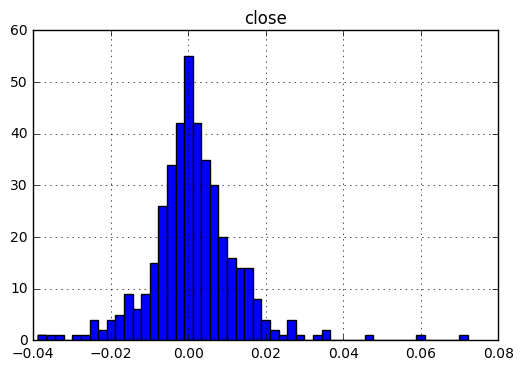

            close
count  413.000000
mean     0.001427
std      0.011487
min     -0.038777
25%     -0.004258
50%      0.000667
75%      0.006346
max      0.072089


In [50]:
daily_pct_c.dropna(inplace = True)
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [51]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

               close
date_txn            
2016-07-28  1.013502
2016-07-29  1.012239
2016-08-01  1.030112
2016-08-02  1.014862
2016-08-03  1.027586
2016-08-04  1.028363
2016-08-05  1.044002
2016-08-08  1.052647
2016-08-09  1.056921
2016-08-10  1.049053
2016-08-11  1.048373
2016-08-12  1.050801
2016-08-15  1.063429
2016-08-16  1.062458
2016-08-17  1.060903
2016-08-18  1.059543
2016-08-19  1.062263
2016-08-22  1.054007
2016-08-23  1.057309
2016-08-24  1.049344
2016-08-25  1.044876
2016-08-26  1.038757
2016-08-29  1.037591
2016-08-30  1.029626
2016-08-31  1.030597
2016-09-01  1.036717
2016-09-02  1.046430
2016-09-06  1.046139
2016-09-07  1.052550
2016-09-08  1.024964
...              ...
2018-02-03  1.721863
2018-02-04  1.748127
2018-02-05  1.755520
2018-02-06  1.754811
2018-02-07  1.729127
2018-02-08  1.753176
2018-02-09  1.756176
2018-02-10  1.747688
2018-02-11  1.792891
2018-02-12  1.769298
2018-02-13  1.772367
2018-02-14  1.776868
2018-02-15  1.769006
2018-02-16  1.769153
2018-02-17  1

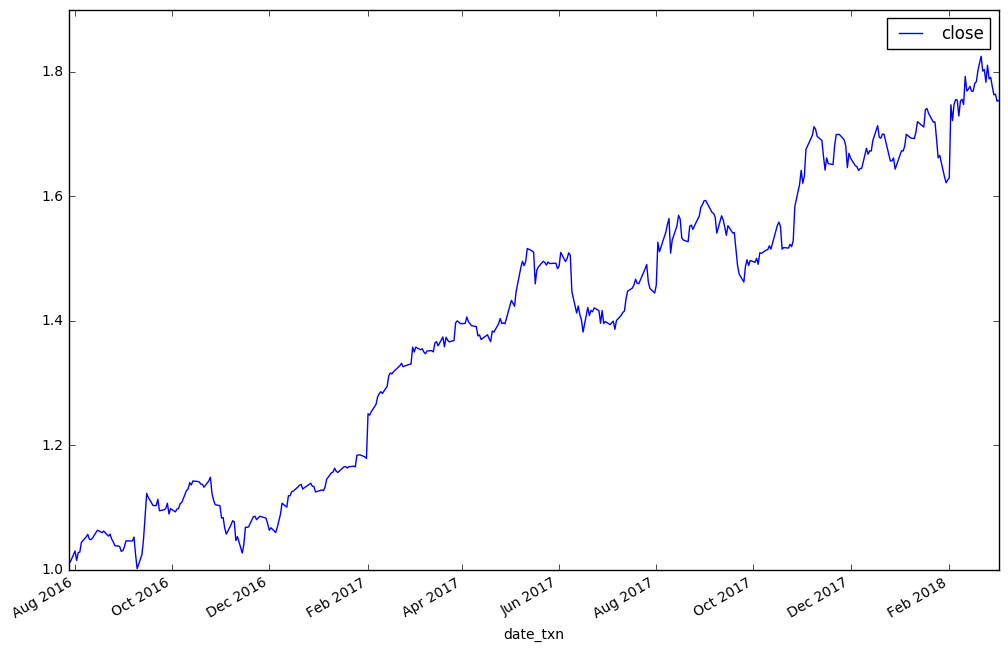

In [52]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [53]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

               close
date_txn            
2016-07-31  1.012870
2016-08-31  1.045801
2016-09-30  1.076806
2016-10-31  1.123916
2016-11-30  1.069978
2016-12-31  1.110595
2017-01-31  1.161438
2017-02-28  1.298827
2017-03-31  1.365885
2017-04-30  1.387925
2017-05-31  1.478657
2017-06-30  1.435953
2017-07-31  1.440500
2017-08-31  1.544646
2017-09-30  1.530923
2017-10-31  1.532814
2017-11-30  1.674659
2017-12-31  1.669660
2018-01-31  1.690192
2018-02-28  1.769905
2018-03-31  1.758695


# Moving Windows

In [54]:
# Calculate the moving average
moving_avg = daily_close.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

,close
date_txn,
2018-02-23,178.550482
2018-02-24,178.781849
2018-02-25,179.084188
2018-02-26,179.330831
2018-02-27,179.559274
2018-02-28,179.704456
2018-03-01,179.837917
2018-03-02,179.901465
2018-03-03,179.931865


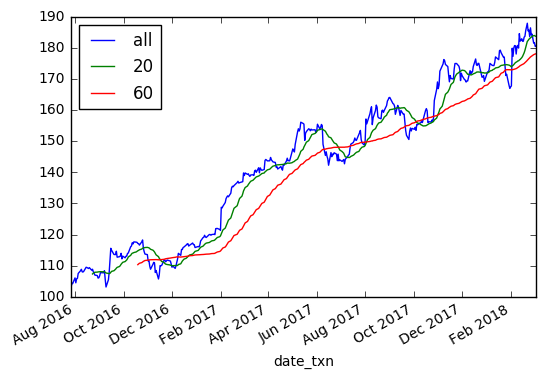

In [57]:
# Short moving window rolling mean
df['20'] = daily_close.rolling(window=20).mean()

# Long moving window rolling mean
df['60'] = daily_close.rolling(window=60).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df['all'] = daily_close
df[['all','20', '60']].plot()

plt.show()

# Volatality

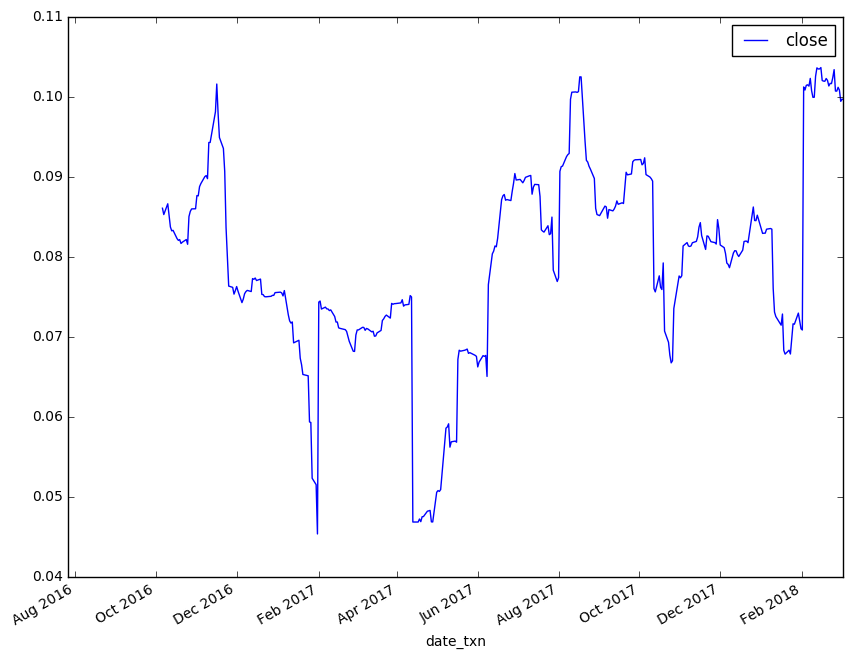

In [58]:
daily_pct_change = daily_close.pct_change()
# Define the minumum of periods to consider 
min_periods = 50 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

# Building Trading Strategy

In [80]:
short_window = 20
long_window = 60

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

# Creating short simple moving average over the short window
signals['short_mavg'] = daily_close.rolling(window=short_window, min_periods=1, center=False).mean()

# Creating long simple moving average over the long window
signals['long_mavg'] = daily_close.rolling(window=long_window, min_periods=1, center=False).mean()

# Creating signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

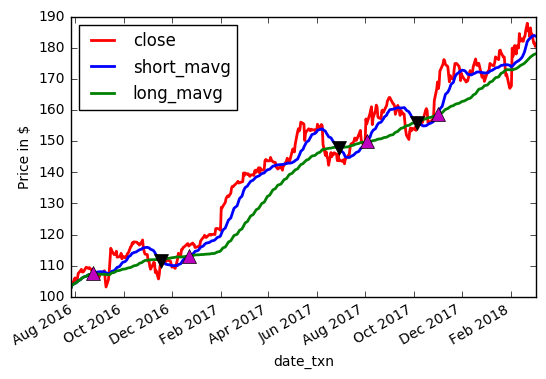

In [81]:
# Initialize the plot figure
fig = plt.figure()
ax1 = fig.add_subplot(111,  ylabel='Price in $')
daily_close.plot(ax=ax1, color='r', lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.show()

# Backtesting Strategy

In [100]:
# Set the initial capital
initial_capital= float(10000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(df['all'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(df['all'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(df['all'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

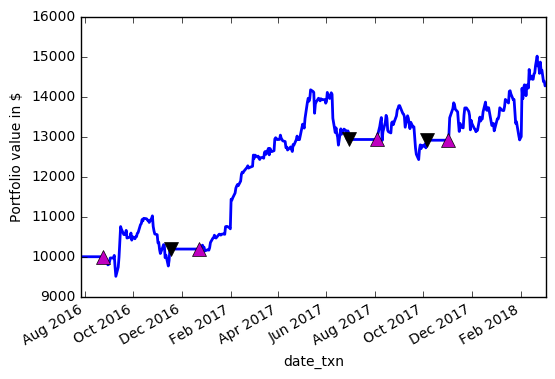

In [101]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
portfolio['total'].plot(ax=ax1, lw=2.)

# "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

plt.show()

# Evaluation methods
# Sharpe Ratio

In [102]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

1.21295059032


# Maximum Drawdown with Graph

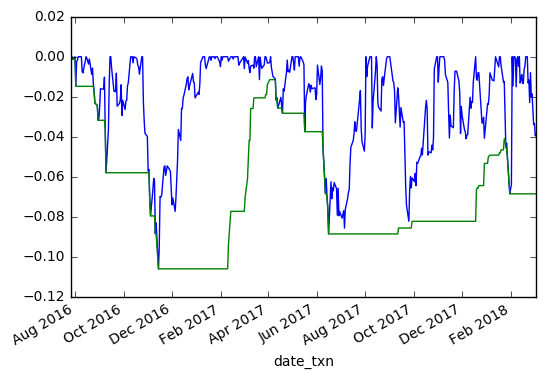

In [103]:
# Define a trailing 252 trading day window
window = 60

# Calculate the max drawdown in the past window days for each day
rolling_max = df['all'].rolling(window, min_periods=1).max()
daily_drawdown = df['all']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

# Compound Annual Growth Rate ( CAGR )

In [104]:
# Get the number of days in `aapl`
days = (df.index[-1] - df.index[0]).days

# Calculate the CAGR 
cagr = ((((df['all'][-1]) / df['all'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.408117562031
